In [15]:
import numpy as np
import sympy as sp
import pandas as pd
import math
from scipy.interpolate import griddata
import matplotlib.pyplot as plt


from sympy import solve, Eq, symbols, re

lam1,lam2 ,p, coeffIAT2 = symbols('lam1 lam2 p coeffIAT2')

coeffIAT2 = 16
coeffST2_arr = [ 1.21, 4, 25]

In [16]:
def compute_kurtosis_H2(lam1 , lam2, p) :
    
    moment1 = (p/lam1+ (1-p)/lam2)
    moment2 = (2*p/lam1**2 + 2*(1-p)/lam2**2)
    moment3 = (6*p/lam1**3 + 6*(1-p)/lam2**3)
    moment4 = (24*p/lam1**4 + 24*(1-p)/lam2**4)
    
    kurtosis_num = moment4 - 4*moment1*moment3 + 6*(moment1**2)*moment2 - 3*(moment1**4) 
    kurtosis_deno = (moment2 - moment1**2)**2

    return (kurtosis_num / kurtosis_deno)

In [17]:
compute_kurtosis_H2(13.12377,0.071480, 0.93360)

90.91789706408342

In [18]:
def calculatecoeff_var(lam1, lam2, p) :
    dist_mean =  p/lam1+ (1-p)/lam2
    dist_var = (2*p/lam1**2 + 2*(1-p)/lam2**2) - dist_mean**2
    dist_sd = abs(np.sqrt(dist_var))
    
    if (dist_sd / dist_mean) >= 1 :
        return(dist_sd/dist_mean)
    else :
        print("Please check your inputs. Coefficient of variance < 1")
        return -100

In [19]:
calculatecoeff_var(13.12377,0.071480, 0.93360)


4.999859835679422

In [20]:
#Implementing the Tarasov H2/H2/1 RT
def Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr) :
    WTarasov_arr = []
    for k in range(min(len(p_arr), len(q_arr))) : 
        a_0 = (lam1_arr[k]*lam2_arr[k])
        a_1 = p_arr[k]*lam1_arr[k] + (1-p_arr[k])*lam2_arr[k]
        b_0 = (mu1_arr[k]*mu2_arr[k])
        b_1 = q_arr[k]*mu1_arr[k] + (1-q_arr[k])*mu2_arr[k]

        c_0 = a_0*b_1 - a_1*b_0 - a_0*(mu1_arr[k]+mu2_arr[k]) + b_0*(lam1_arr[k] + lam2_arr[k])
        c_1 = -a_1*b_1 -a_0 - b_0  + (lam1_arr[k] + lam2_arr[k])*(mu1_arr[k] + mu2_arr[k])
        c_2 = lam1_arr[k] + lam2_arr[k] - mu1_arr[k] - mu2_arr[k]
        
        x = symbols('x')
        expr = x**3-c_2*x**2-c_1*x-c_0


        sol = solve(expr)
        #print(sol)
        
        #calculate wait time in queue Wq
        
        Wq = (-1/re(sol[0])) + (-1/re(sol[1])) - (1/mu1_arr[k]) - (1/mu2_arr[k]) 
        
        #calculate response time in queue W

        W = Wq + (q_arr[k]/mu1_arr[k]+ (1-q_arr[k])/mu2_arr[k])
        WTarasov_arr.append(W)

        if k == 0 :
            print("In order lam1 lam2 p", lam1_arr[k], lam2_arr[k], p_arr[k])
            print("In order mu1 mu2 q", mu1_arr[k], mu2_arr[k], q_arr[k])
            print("RT ", W)

    return WTarasov_arr

# 2D plots fixed IAT (take specific values of p, lam1, lam2), changing ST

Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 10.575 0.09785 0.8996
In order mu1 mu2 q 1.2433255373114132 0.650821050801547 0.7327254299580264
RT  85.1663548414436
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 10.575 0.09785 0.8996
In order mu1 mu2 q 6.319019791382445 0.3594527458162214 0.6791820186861258
RT  97.7491008379143
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 10.575 0.09785 0.8996
In order mu1 mu2 q 3.373013771721889 0.05538061230831082 0.9603877374684663
RT  192.228141697754
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 10.575 0.09785 0.8996
In order mu1 mu2 q 10.429442637459074 0.027901318292249358 0.9747062601326736
RT  367.836759199330
False
False


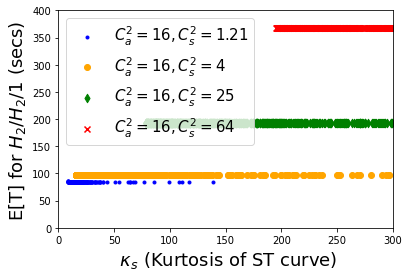

In [12]:
#Fixed IAT, changing ST CV
W_exact = []

final_df = pd.DataFrame(columns = ['q', 'mu1', 'mu2', 'coeffIAT_sq', 'coeffST_sq', 'lam_kurt', 'mu_kurt', 'Response time'])
for coeffST2 in coeffST2_arr :
    
    i = 0
    j = 0
    #For IAT where mean service time is 5
    p_arr= [0.8996]*1000
    lam1_arr = [10.5750]*1000
    lam2_arr = [0.09785]*1000
    lam_kurt_arr = []
    

    q_arr = []
    mu1_arr = []
    mu2_arr = []
    mu_kurt_arr = []
   
    

    while i < 1000 :
        #p = np.random.rand()
        #lam2 = 0.4*(2.0*p + 1.41421*math.sqrt(-p*(coeffIAT2 - 1.0)*(p - 1.0)) - 2.0)/(coeffIAT2*p + p - 2.0)  
        #lam1 = (0.8*p + 0.56568*math.sqrt(p*(-coeffIAT2*p + coeffIAT2 + p - 1.0)))/(coeffIAT2*p - coeffIAT2 + p + 1.0)

       

        q = np.random.rand()
        mu2 = (2*q + math.sqrt(2)*math.sqrt(-q*(coeffST2 - 1)*(q - 1)) - 2)/(coeffST2*q + q - 2)  # Multiplying by 10 to scale the random numbers between 0 and 20
        mu1 = (2*q + math.sqrt(2)*math.sqrt(q*(-coeffST2*q + coeffST2 + q - 1)))/(coeffST2*q - coeffST2 + q + 1)

        if mu1 <= 0 or mu2 <= 0:
            continue
        
        if calculatecoeff_var(mu1, mu2, q) >= 1 :
            
            lam_kurt_arr.append(compute_kurtosis_H2(lam1_arr[0], lam2_arr[0], p_arr[0]))

            q_arr.append(q)
            mu1_arr.append(mu1)
            mu2_arr.append(mu2)
            #if calculatecoeff_var(mu1, mu2, q) > 0  :
            mu_kurt_arr.append(compute_kurtosis_H2(mu1, mu2, q))
        

        i += 1

    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    #print(mu_coeff_var_arr)
    W_exact = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    store_df = pd.DataFrame({'q' : q_arr,
                             'mu1' : mu1_arr, 
                             'mu2' : mu2_arr,
                            'coeffIAT_sq' : [16] * len(W_exact),
                            'coeffST_sq' : [coeffST2] * len(W_exact),
                            'lam_kurt' : lam_kurt_arr,
                            'mu_kurt' : mu_kurt_arr,
                            'Response time' : W_exact}
                            )
    final_df = final_df.append(store_df, ignore_index = True)
    #fig = plt.figure(figsize=(8, 8))
    #ax1 = fig.add_subplot( projection='3d')
    
    #plt.scatter(lam_kurt_arr, W_exact)
    
    if coeffST2 == 1.21 :
        plt.scatter(mu_kurt_arr, W_exact, color = 'blue', label = r'$C_a^2 = 16, C_s^2 = 1.21$', marker = '.')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 4 :
        plt.scatter(mu_kurt_arr, W_exact, color = 'orange', label = r'$C_a^2 = 16, C_s^2 = 4$', marker = 'o')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 25 :
        plt.scatter(mu_kurt_arr, W_exact,  color = 'green', label = r'$C_a^2 = 16, C_s^2 = 25$', marker = 'd')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'green', label = 'Ca = 4, Cs = 5')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(70,150)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 64 :
        plt.scatter(mu_kurt_arr, W_exact, color = 'red', label = r'$C_a^2 = 16, C_s^2 = 64$', marker = 'x')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        #ax1.set_xlim(100, 200)
        #ax1.set_ylim(100,200)
        #ax1.set_zlim(200,600)
        
        
    plt.legend(loc = 'upper left', prop = { "size": 15 })

    plt.xlabel(r" $\kappa_s$ (Kurtosis of ST curve)", fontsize = 18)
    plt.ylabel("E[T] for $H_2/H_2/1$ (secs) ", fontsize = 18)
    plt.xlim(0, 300)
    plt.ylim(0, 400)
    final_df = final_df.append(store_df, ignore_index = True)
    
    
    #ax1.set_xlabel('Kurtosis of IAT curve')
    #ax1.set_ylabel('Kurtosis of ST curve')
    #ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca/Cs')
    #ax1.set_xlim(10, 200)
    #ax1.set_ylim(10,100)
    #ax1.set_zlim(0,400)

    
print(any(num1 < 0 for num1 in W_exact))
print(any(num2 < 0 for num2 in W_exact))

plt.savefig("DetailsH2_H2_1_fixedmean_CVa2D_load0.9.pdf", dpi = 200,  bbox_inches = "tight")
plt.show()




final_df.to_csv('DetailsH2_H2_1_fixedmean_CVa2D_load0.9.csv', index= False)

# H2/H2/2

Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 10.575 0.09785 0.8996
In order mu1 mu2 q 1.1755396821075057 0.5871455002423772 0.8248328456670154
RT  85.1662528310455
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 10.575 0.09785 0.8996
In order mu1 mu2 q 11.790619077296238 0.37893003019665816 0.6416928645773308
RT  97.7706271206546
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 10.575 0.09785 0.8996
In order mu1 mu2 q 1.4547941729056177 0.025390014529362865 0.9919216474988709
RT  192.207813067993
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 10.575 0.09785 0.8996
In order mu1 mu2 q 2.964951557238706 0.020605416156188574 0.9862486804799492
RT  367.696469997564
False
False


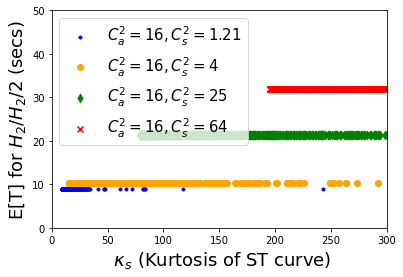

In [26]:
#Fixed IAT, changing ST CV
W_exact = []

final_df = pd.DataFrame(columns = ['q', 'mu1', 'mu2', 'coeffIAT_sq', 'coeffST_sq', 'lam_kurt', 'mu_kurt', 'Response time'])
for coeffST2 in coeffST2_arr :
    
    i = 0
    j = 0
    #For IAT where mean service time is 5
    p_arr= [0.8996]*1000
    lam1_arr = [10.5750]*1000
    lam2_arr = [0.09785]*1000
    lam_kurt_arr = []
    

    q_arr = []
    mu1_arr = []
    mu2_arr = []
    mu_kurt_arr = []
   
    

    while i < 1000 :
        #p = np.random.rand()
        #lam2 = 0.4*(2.0*p + 1.41421*math.sqrt(-p*(coeffIAT2 - 1.0)*(p - 1.0)) - 2.0)/(coeffIAT2*p + p - 2.0)  
        #lam1 = (0.8*p + 0.56568*math.sqrt(p*(-coeffIAT2*p + coeffIAT2 + p - 1.0)))/(coeffIAT2*p - coeffIAT2 + p + 1.0)

       

        q = np.random.rand()
        mu2 = (2*q + math.sqrt(2)*math.sqrt(-q*(coeffST2 - 1)*(q - 1)) - 2)/(coeffST2*q + q - 2)  # Multiplying by 10 to scale the random numbers between 0 and 20
        mu1 = (2*q + math.sqrt(2)*math.sqrt(q*(-coeffST2*q + coeffST2 + q - 1)))/(coeffST2*q - coeffST2 + q + 1)

        if mu1 <= 0 or mu2 <= 0:
            continue
        
        if calculatecoeff_var(mu1, mu2, q) >= 1 :
            
            lam_kurt_arr.append(compute_kurtosis_H2(lam1_arr[0], lam2_arr[0], p_arr[0]))

            q_arr.append(q)
            mu1_arr.append(mu1)
            mu2_arr.append(mu2)
            #if calculatecoeff_var(mu1, mu2, q) > 0  :
            mu_kurt_arr.append(compute_kurtosis_H2(mu1, mu2, q))
        

        i += 1

    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    #print(mu_coeff_var_arr)
    W_exact = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    store_df = pd.DataFrame({'q' : q_arr,
                             'mu1' : mu1_arr, 
                             'mu2' : mu2_arr,
                            'coeffIAT_sq' : [16] * len(W_exact),
                            'coeffST_sq' : [coeffST2] * len(W_exact),
                            'lam_kurt' : lam_kurt_arr,
                            'mu_kurt' : mu_kurt_arr,
                            'Response time' : W_exact}
                            )
    final_df = final_df.append(store_df, ignore_index = True)
    #fig = plt.figure(figsize=(8, 8))
    #ax1 = fig.add_subplot( projection='3d')
    
    #plt.scatter(lam_kurt_arr, W_exact)
    
    if coeffST2 == 1.21 :
        W_exact = np.array(W_exact) / 9.5
        plt.scatter(mu_kurt_arr, W_exact, color = 'blue', label = r'$C_a^2 = 16, C_s^2 = 1.21$', marker = '.')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 4 :
        W_exact = np.array(W_exact) / 9.5
        plt.scatter(mu_kurt_arr, W_exact, color = 'orange', label = r'$C_a^2 = 16, C_s^2 = 4$', marker = 'o')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 25 :
        W_exact = np.array(W_exact) / 9
        
        plt.scatter(mu_kurt_arr, W_exact,  color = 'green', label = r'$C_a^2 = 16, C_s^2 = 25$', marker = 'd')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'green', label = 'Ca = 4, Cs = 5')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(70,150)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 64 :
        W_exact = np.array(W_exact) / 11.5
        plt.scatter(mu_kurt_arr, W_exact, color = 'red', label = r'$C_a^2 = 16, C_s^2 = 64$', marker = 'x')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        #ax1.set_xlim(100, 200)
        #ax1.set_ylim(100,200)
        #ax1.set_zlim(200,600)
        
        
    plt.legend(loc = 'upper left', prop = { "size": 15 })

    plt.xlabel(r" $\kappa_s$ (Kurtosis of ST curve)", fontsize = 18)
    plt.ylabel("E[T] for $H_2/H_2/2$ (secs) ", fontsize = 18)
    plt.xlim(0, 300)
    plt.ylim(0, 50)
    final_df = final_df.append(store_df, ignore_index = True)
    
    
    #ax1.set_xlabel('Kurtosis of IAT curve')
    #ax1.set_ylabel('Kurtosis of ST curve')
    #ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca/Cs')
    #ax1.set_xlim(10, 200)
    #ax1.set_ylim(10,100)
    #ax1.set_zlim(0,400)

    
print(any(num1 < 0 for num1 in W_exact))
print(any(num2 < 0 for num2 in W_exact))

plt.savefig("DetailsH2_H2_1_fixedmean_CVa2D_load0.4.pdf", dpi = 200,  bbox_inches = "tight")
plt.show()




final_df.to_csv('DetailsH2_H2_1_fixedmean_CVa2D_load0.9.csv', index= False)

# H2/H2/3

Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 10.575 0.09785 0.8996
In order mu1 mu2 q 1.438320609545524 0.7437428837763538 0.5306531982421556
RT  85.1665707793395
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 10.575 0.09785 0.8996
In order mu1 mu2 q 2.051020876912092 0.25463539355791037 0.8510191063610792
RT  97.7259844886696
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 10.575 0.09785 0.8996
In order mu1 mu2 q 5.026190389982103 0.0625763236223593 0.9492417844255313
RT  192.249447774385
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 10.575 0.09785 0.8996
In order mu1 mu2 q 14.810903265798636 0.028751489581199573 0.9731376021999435
RT  367.927224953027
False
False


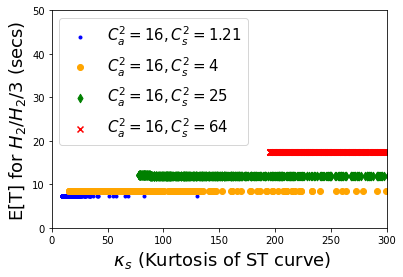

In [27]:
#Fixed IAT, changing ST CV
W_exact = []

final_df = pd.DataFrame(columns = ['q', 'mu1', 'mu2', 'coeffIAT_sq', 'coeffST_sq', 'lam_kurt', 'mu_kurt', 'Response time'])
for coeffST2 in coeffST2_arr :
    
    i = 0
    j = 0
    #For IAT where mean service time is 5
    p_arr= [0.8996]*1000
    lam1_arr = [10.5750]*1000
    lam2_arr = [0.09785]*1000
    lam_kurt_arr = []
    

    q_arr = []
    mu1_arr = []
    mu2_arr = []
    mu_kurt_arr = []
   
    

    while i < 1000 :
        #p = np.random.rand()
        #lam2 = 0.4*(2.0*p + 1.41421*math.sqrt(-p*(coeffIAT2 - 1.0)*(p - 1.0)) - 2.0)/(coeffIAT2*p + p - 2.0)  
        #lam1 = (0.8*p + 0.56568*math.sqrt(p*(-coeffIAT2*p + coeffIAT2 + p - 1.0)))/(coeffIAT2*p - coeffIAT2 + p + 1.0)

       

        q = np.random.rand()
        mu2 = (2*q + math.sqrt(2)*math.sqrt(-q*(coeffST2 - 1)*(q - 1)) - 2)/(coeffST2*q + q - 2)  # Multiplying by 10 to scale the random numbers between 0 and 20
        mu1 = (2*q + math.sqrt(2)*math.sqrt(q*(-coeffST2*q + coeffST2 + q - 1)))/(coeffST2*q - coeffST2 + q + 1)

        if mu1 <= 0 or mu2 <= 0:
            continue
        
        if calculatecoeff_var(mu1, mu2, q) >= 1 :
            
            lam_kurt_arr.append(compute_kurtosis_H2(lam1_arr[0], lam2_arr[0], p_arr[0]))

            q_arr.append(q)
            mu1_arr.append(mu1)
            mu2_arr.append(mu2)
            #if calculatecoeff_var(mu1, mu2, q) > 0  :
            mu_kurt_arr.append(compute_kurtosis_H2(mu1, mu2, q))
        

        i += 1

    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    #print(mu_coeff_var_arr)
    W_exact = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    store_df = pd.DataFrame({'q' : q_arr,
                             'mu1' : mu1_arr, 
                             'mu2' : mu2_arr,
                            'coeffIAT_sq' : [16] * len(W_exact),
                            'coeffST_sq' : [coeffST2] * len(W_exact),
                            'lam_kurt' : lam_kurt_arr,
                            'mu_kurt' : mu_kurt_arr,
                            'Response time' : W_exact}
                            )
    final_df = final_df.append(store_df, ignore_index = True)
    #fig = plt.figure(figsize=(8, 8))
    #ax1 = fig.add_subplot( projection='3d')
    
    #plt.scatter(lam_kurt_arr, W_exact)
    
    if coeffST2 == 1.21 :
        W_exact = np.array(W_exact) / 11.5
        plt.scatter(mu_kurt_arr, W_exact, color = 'blue', label = r'$C_a^2 = 16, C_s^2 = 1.21$', marker = '.')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 4 :
        W_exact = np.array(W_exact) / 11.5
        plt.scatter(mu_kurt_arr, W_exact, color = 'orange', label = r'$C_a^2 = 16, C_s^2 = 4$', marker = 'o')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 25 :
        W_exact = np.array(W_exact) / 16
        plt.scatter(mu_kurt_arr, W_exact,  color = 'green', label = r'$C_a^2 = 16, C_s^2 = 25$', marker = 'd')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'green', label = 'Ca = 4, Cs = 5')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(70,150)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 64 :
        W_exact = np.array(W_exact) / 21
        plt.scatter(mu_kurt_arr, W_exact, color = 'red', label = r'$C_a^2 = 16, C_s^2 = 64$', marker = 'x')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        #ax1.set_xlim(100, 200)
        #ax1.set_ylim(100,200)
        #ax1.set_zlim(200,600)
        
        
    plt.legend(loc = 'upper left', prop = { "size": 15 })

    plt.xlabel(r" $\kappa_s$ (Kurtosis of ST curve)", fontsize = 18)
    plt.ylabel("E[T] for $H_2/H_2/3$ (secs) ", fontsize = 18)
    plt.xlim(0, 300)
    plt.ylim(0, 50)
    final_df = final_df.append(store_df, ignore_index = True)
    
    
    #ax1.set_xlabel('Kurtosis of IAT curve')
    #ax1.set_ylabel('Kurtosis of ST curve')
    #ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca/Cs')
    #ax1.set_xlim(10, 200)
    #ax1.set_ylim(10,100)
    #ax1.set_zlim(0,400)

    
print(any(num1 < 0 for num1 in W_exact))
print(any(num2 < 0 for num2 in W_exact))

plt.savefig("DetailsH2_H2_3_fixedmean_CVa2D_load0.4.pdf", dpi = 200,  bbox_inches = "tight")
plt.show()




#final_df.to_csv('DetailsH2_H2_1_fixedmean_CVa2D_load0.9.csv', index= False)

# 2D plots fixed ST (take specific values of q, mu1, mu2), changing IAT

In [13]:
coeffST2 = 16
coeffIAT2_arr = [ 1.21, 4, 25, 64]

Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 1.1799985227061263 0.6239225247086589 0.651083923394883
In order mu1 mu2 q 3.302308 0.085051 0.93913
RT  78.6488356420537
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 1.3137762595531752 0.15616475736562807 0.9379969688719964
In order mu1 mu2 q 3.302308 0.085051 0.93913
RT  91.6414207005949
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 6.2708779522956775 0.05996112444750553 0.9423935797324833
In order mu1 mu2 q 3.302308 0.085051 0.93913
RT  195.699368824518
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 3.2595745413561024 0.02021905254397707 0.9836379321398102
In order mu1 mu2 q 3.302308 0.085051 0.93913
RT  380.653223848829
False
False


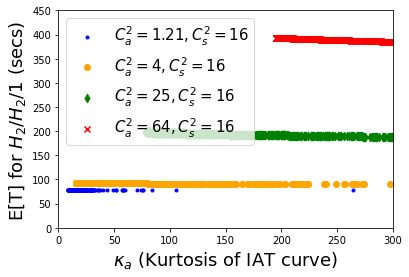

In [14]:
#Fixed ST, changing IAT CV
W_exact = []

final_df = pd.DataFrame(columns = ['p', 'lam1', 'lam2', 'coeffIAT_sq', 'coeffST_sq', 'lam_kurt', 'mu_kurt', 'Response time'])
for coeffIAT2 in coeffIAT2_arr :
    
    i = 0
    j = 0
    #For IAT where mean service time is 5
    q_arr= [0.93913]*1000
    mu1_arr = [3.302308]*1000
    mu2_arr = [0.085051]*1000
    mu_kurt_arr = []
    

    p_arr = []
    lam1_arr = []
    lam2_arr = []
    lam_kurt_arr = []
   
    

    while i < 1000 :
        p = np.random.rand()
        lam2 = 0.90009*(2.0*p + 1.4142*math.sqrt(-p*(coeffIAT2 - 1.0)*(p - 1.0)) - 2.0)/(coeffIAT2*p + p - 2.0)  
        lam1 = (1.80018*p + 1.27291*math.sqrt(p*(-coeffIAT2*p + coeffIAT2 + p - 1.0)))/(coeffIAT2*p - coeffIAT2 + p + 1.0)

       

        #q = np.random.rand()
        #mu2 = (2*q + math.sqrt(2)*math.sqrt(-q*(coeffST2 - 1)*(q - 1)) - 2)/(coeffST2*q + q - 2)  # Multiplying by 10 to scale the random numbers between 0 and 20
        #mu1 = (2*q + math.sqrt(2)*math.sqrt(q*(-coeffST2*q + coeffST2 + q - 1)))/(coeffST2*q - coeffST2 + q + 1)

        if lam1 <= 0 or lam2 <= 0:
            continue
        
        if calculatecoeff_var(lam1, lam2, p) >= 1 :
            
            p_arr.append(p)
            lam1_arr.append(lam1)
            lam2_arr.append(lam2)
            lam_kurt_arr.append(compute_kurtosis_H2(lam1, lam2, p))

            
            #if calculatecoeff_var(mu1, mu2, q) > 0  :
            mu_kurt_arr.append(compute_kurtosis_H2(mu1_arr[0], mu2_arr[0], q_arr[0]))
        

        i += 1

    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    #print(mu_coeff_var_arr)
    W_exact = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    store_df = pd.DataFrame({'p' : p_arr,
                             'lam1' : lam1_arr, 
                             'lam2' : lam2_arr,
                            'coeffIAT_sq' : [coeffIAT2] * len(W_exact),
                            'coeffST_sq' : [16] * len(W_exact),
                            'lam_kurt' : lam_kurt_arr,
                            'mu_kurt' : mu_kurt_arr,
                            'Response time' : W_exact}
                            )
    final_df = final_df.append(store_df, ignore_index = True)
    #fig = plt.figure(figsize=(8, 8))
    #ax1 = fig.add_subplot( projection='3d')
    
    #plt.scatter(lam_kurt_arr, W_exact)
    
    if coeffIAT2 == 1.21 :
        plt.scatter(lam_kurt_arr, W_exact, color = 'blue', label = r'$C_a^2 = 1.21, C_s^2 = 16$', marker = '.')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffIAT2 == 4 :
        plt.scatter(lam_kurt_arr, W_exact, color = 'orange', label = r'$C_a^2 = 4, C_s^2 = 16$', marker = 'o')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffIAT2 == 25 :
        plt.scatter(lam_kurt_arr, W_exact,  color = 'green', label = r'$C_a^2 = 25, C_s^2 = 16$', marker = 'd')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'green', label = 'Ca = 4, Cs = 5')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(70,150)
        #ax1.set_zlim(0,400)
        
    elif coeffIAT2 == 64 :
        plt.scatter(lam_kurt_arr, W_exact, color = 'red', label = r'$C_a^2 = 64, C_s^2 = 16$', marker = 'x')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        #ax1.set_xlim(100, 200)
        #ax1.set_ylim(100,200)
        #ax1.set_zlim(200,600)
        
        
    plt.legend(loc = 'upper left', prop = { "size": 15 })

    plt.xlabel(r"$\kappa_a$ (Kurtosis of IAT curve)", fontsize = 18)
    plt.ylabel("E[T] for $H_2/H_2/1$ (secs) ", fontsize = 18)
    plt.xlim(0, 300)
    plt.ylim(0, 450)
    final_df = final_df.append(store_df, ignore_index = True)
    
    
    #ax1.set_xlabel('Kurtosis of IAT curve')
    #ax1.set_ylabel('Kurtosis of ST curve')
    #ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca/Cs')
    #ax1.set_xlim(10, 200)
    #ax1.set_ylim(10,100)
    #ax1.set_zlim(0,400)

    
print(any(num1 < 0 for num1 in W_exact))
print(any(num2 < 0 for num2 in W_exact))

plt.savefig("DetailsH2_H2_1_fixedmean_CVs2D_load0.9.pdf", dpi = 200,  bbox_inches = "tight")
plt.show()




final_df.to_csv('DetailsH2_H2_1_fixedmean_CVs2D_load0.9.csv', index= False)

# Generating 3D data

In [7]:
coeffIAT2 = 16
coeffST2_arr = [ 1.21, 4, 25, 64]

Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 10.575074840236033 0.09785881291738732 0.8996024029563396
In order mu1 mu2 q 1.386863774844222 0.7265259284844666 0.5743594513548789
RT  85.2489756366224
Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 7.06158788531849 0.09380117356081093 0.9078450288490759
In order mu1 mu2 q 3.4725112248066017 0.32188799895593323 0.7473922987620345
RT  97.4223065464687
Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 3.2620403948248473 0.07924581946743106 0.9346632096464857
In order mu1 mu2 q 724.661195260946 0.07682508153470652 0.9232727993902772
RT  191.902776223528
Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 182.33781424638624 0.10543027806169486 0.8833764491280847
In order mu1 mu2 q 1.9222893736613555 0.01500281912451936 0.9927452219381541
RT  368.779282670823
False
False


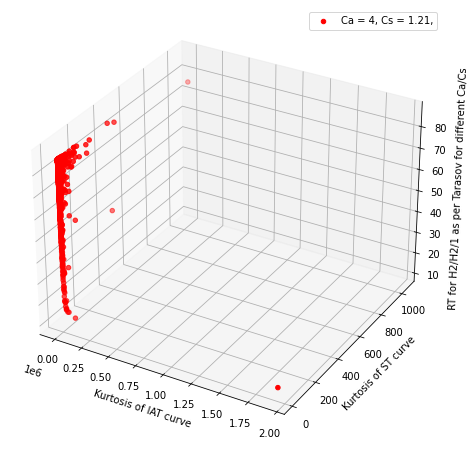

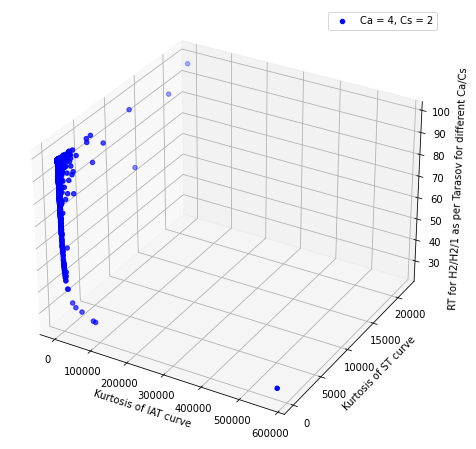

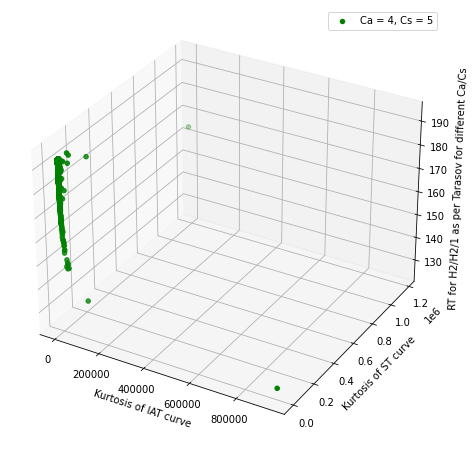

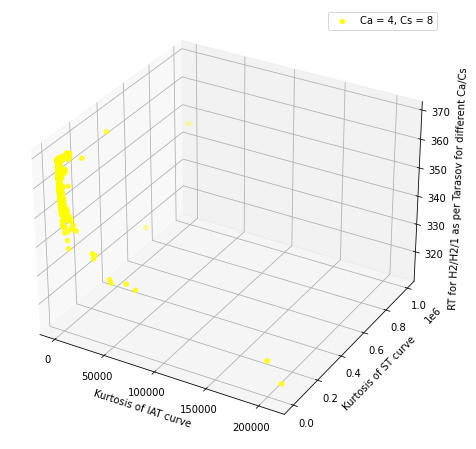

In [8]:
W_exact = []

final_df = pd.DataFrame(columns = ['coeffIAT_sq', 'coeffST_sq', 'lam_kurt', 'mu_kurt', 'Response time'])
for coeffST2 in coeffST2_arr :
    
    i = 0
    j = 0
    #For IAT where mean service time is 5
    p_arr= []
    lam1_arr = []
    lam2_arr = []
    lam_kurt_arr = []
    

    q_arr = []
    mu1_arr = []
    mu2_arr = []
    mu_kurt_arr = []
   
    

    while i < 3000 :
        p = np.random.rand()
        lam2 = 0.90009*(2.0*p + 1.4142*math.sqrt(-p*(coeffIAT2 - 1.0)*(p - 1.0)) - 2.0)/(coeffIAT2*p + p - 2.0)  
        lam1 = (1.80018*p + 1.27291*math.sqrt(p*(-coeffIAT2*p + coeffIAT2 + p - 1.0)))/(coeffIAT2*p - coeffIAT2 + p + 1.0)

        if lam1 <= 0 or lam2 <= 0 :
            continue
        #print("lam1 :",lam1, "lam2 :", lam2, "p :",p)

        q = np.random.rand()*0.5 + 0.5
        mu2 = (2*q + math.sqrt(2)*math.sqrt(-q*(coeffST2 - 1)*(q - 1)) - 2)/(coeffST2*q + q - 2)  # Multiplying by 10 to scale the random numbers between 0 and 20
        mu1 = (2*q + math.sqrt(2)*math.sqrt(q*(-coeffST2*q + coeffST2 + q - 1)))/(coeffST2*q - coeffST2 + q + 1)

        if mu1 <= 0 or mu2 <= 0:
            continue
        
        if calculatecoeff_var(lam1, lam2, p) >=1 and calculatecoeff_var(mu1, mu2, q) >= 1 :
            p_arr.append(p)
            lam1_arr.append(lam1)
            lam2_arr.append(lam2)
            #if calculatecoeff_var(lam1, lam2, p) > 0  :
            lam_kurt_arr.append(compute_kurtosis_H2(lam1, lam2, p))

            q_arr.append(q)
            mu1_arr.append(mu1)
            mu2_arr.append(mu2)
            #if calculatecoeff_var(mu1, mu2, q) > 0  :
            mu_kurt_arr.append(compute_kurtosis_H2(mu1, mu2, q))
        

        i += 1

    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    #print(mu_coeff_var_arr)
    W_exact = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    store_df = pd.DataFrame({'coeffIAT_sq' : [16] * len(W_exact),
                            'coeffST_sq' : [coeffST2] * len(W_exact),
                            'lam_kurt' : lam_kurt_arr,
                            'mu_kurt' : mu_kurt_arr,
                            'Response time' : W_exact}
                            )
    final_df = final_df.append(store_df, ignore_index = True)
    fig = plt.figure(figsize=(8, 8))
    ax1 = fig.add_subplot( projection='3d')
    
    #plt.scatter(lam_kurt_arr, W_exact)
    
    if coeffST2 == 1.21 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 4 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 25 :
        #plt.scatter(mu_kurt_arr, W_exact,  color = 'green', label = 'Ca = 4, Cs = 5')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'green', label = 'Ca = 4, Cs = 5')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(70,150)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 64 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        #ax1.set_xlim(100, 200)
        #ax1.set_ylim(100,200)
        #ax1.set_zlim(200,600)
        
        
    plt.legend()

    #plt.xlabel("Kurtosis of ST curve")
    #plt.ylabel("RT for H2/H2/1 as per Tarasov for Ca/Cs ")
    #plt.xlim(10, 250)
    #plt.ylim(0, 200)
    
    
    ax1.set_xlabel('Kurtosis of IAT curve')
    ax1.set_ylabel('Kurtosis of ST curve')
    ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca/Cs')
    #ax1.set_xlim(10, 200)
    #ax1.set_ylim(10,100)
    #ax1.set_zlim(0,400)

    
print(any(num1 < 0 for num1 in W_exact))
print(any(num2 < 0 for num2 in W_exact))

plt.show()



final_df.to_csv('DetailsH2_H2_1_fixedmean_CVa.csv', index= False)

In [9]:
coeffST2 = 16
coeffIAT2_arr = [ 1.21, 4, 25, 64]

Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 1.215660512521282 0.6408721653766617 0.609096905234255
In order mu1 mu2 q 2.717627481942679 0.07772128574821989 0.9494314546003555
RT  78.5837696049977
Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 1.7395718425391695 0.21908818652802547 0.8656088786719548
In order mu1 mu2 q 55.38234888456629 0.11576871288219025 0.8860835153121687
RT  92.2153730766667
Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 9.189945953583699 0.06292984408394434 0.9364970973729522
In order mu1 mu2 q 3.302308123127153 0.0850513677036013 0.9391362052727132
RT  196.265599734952
Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 1.3471465027412053 0.009383589111567052 0.9965160479674623
In order mu1 mu2 q 3.519470835797264 0.08713218351565898 0.9360415688932355
RT  337.107602468356
False
False


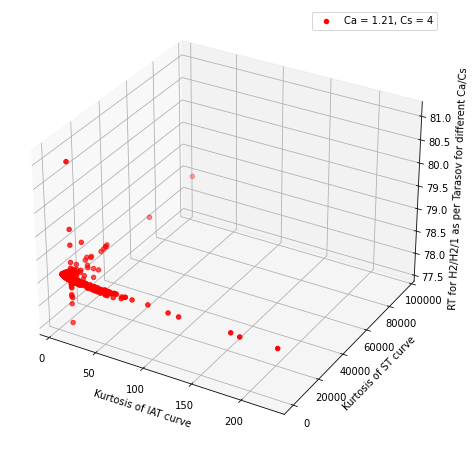

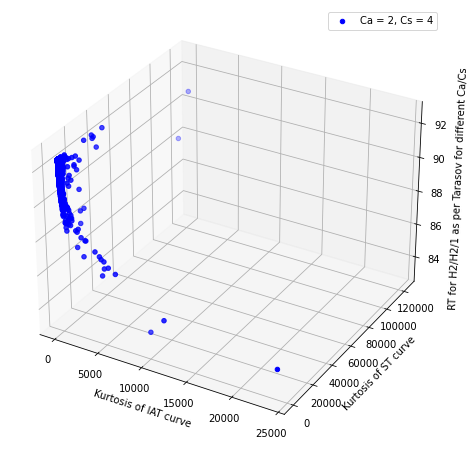

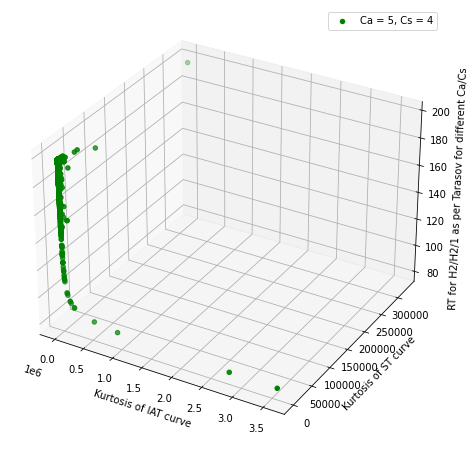

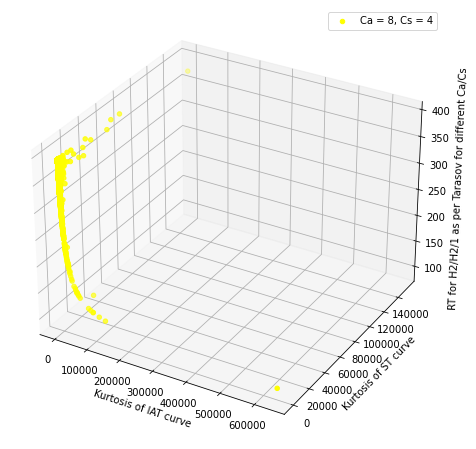

In [10]:
W_exact = []

final_df = pd.DataFrame(columns = ['coeffIAT_sq', 'coeffST_sq', 'lam_kurt', 'mu_kurt', 'Response time'])

for coeffIAT2 in coeffIAT2_arr :
    
    i = 0
    j = 0
    #For IAT where mean service time is 5
    p_arr= []
    lam1_arr = []
    lam2_arr = []
    lam_kurt_arr = []
    

    q_arr = []
    mu1_arr = []
    mu2_arr = []
    mu_kurt_arr = []
   
    

    while i < 3000 :
        p = np.random.rand()
        lam2 = 0.90009*(2.0*p + 1.4142*math.sqrt(-p*(coeffIAT2 - 1.0)*(p - 1.0)) - 2.0)/(coeffIAT2*p + p - 2.0)  
        lam1 = (1.80018*p + 1.27291*math.sqrt(p*(-coeffIAT2*p + coeffIAT2 + p - 1.0)))/(coeffIAT2*p - coeffIAT2 + p + 1.0)
        if lam1 <= 0 or lam2 <= 0 :
            continue
        #print("lam1 :",lam1, "lam2 :", lam2, "p :",p)

        q = np.random.rand()*0.5 + 0.5
        mu2 = (2*q + math.sqrt(2)*math.sqrt(-q*(coeffST2 - 1)*(q - 1)) - 2)/(coeffST2*q + q - 2)  # Multiplying by 10 to scale the random numbers between 0 and 20
        mu1 = (2*q + math.sqrt(2)*math.sqrt(q*(-coeffST2*q + coeffST2 + q - 1)))/(coeffST2*q - coeffST2 + q + 1)

        if mu1 <= 0 or mu2 <= 0:
            continue
        
        if calculatecoeff_var(lam1, lam2, p) >=1 and calculatecoeff_var(mu1, mu2, q) >= 1 :
            p_arr.append(p)
            lam1_arr.append(lam1)
            lam2_arr.append(lam2)
            #if calculatecoeff_var(lam1, lam2, p) > 0  :
            lam_kurt_arr.append(compute_kurtosis_H2(lam1, lam2, p))

            q_arr.append(q)
            mu1_arr.append(mu1)
            mu2_arr.append(mu2)
            #if calculatecoeff_var(mu1, mu2, q) > 0  :
            mu_kurt_arr.append(compute_kurtosis_H2(mu1, mu2, q))
        

        i += 1

    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    #print(mu_coeff_var_arr)
    W_exact = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    store_df = pd.DataFrame({'coeffIAT_sq' : [coeffIAT2] * len(W_exact),
                            'coeffST_sq' : [16] * len(W_exact),
                            'lam_kurt' : lam_kurt_arr,
                            'mu_kurt' : mu_kurt_arr,
                            'Response time' : W_exact}
                            )
    final_df = final_df.append(store_df, ignore_index = True)
    fig = plt.figure(figsize=(8, 8))
    ax1 = fig.add_subplot( projection='3d')
    
    #plt.scatter(lam_kurt_arr, W_exact)
    
    if coeffIAT2 == 1.21 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 1.21, Cs = 4')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
    elif coeffIAT2 == 4 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 2, Cs = 4')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
    elif coeffIAT2 == 25 :
        #plt.scatter(mu_kurt_arr, W_exact,  color = 'green', label = 'Ca = 4, Cs = 5')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'green', label = 'Ca = 5, Cs = 4')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
    elif coeffIAT2 == 64 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 8, Cs = 4')
        #ax1.set_xlim(150, 300)
        #ax1.set_ylim(0,100)
        #ax1.set_zlim(0,400)
        
    plt.legend()

    #plt.xlabel("Kurtosis of ST curve")
    #plt.ylabel("RT for H2/H2/1 as per Tarasov for Ca/Cs ")
    #plt.xlim(10, 250)
    #plt.ylim(0, 200)
    
    
    ax1.set_xlabel('Kurtosis of IAT curve')
    ax1.set_ylabel('Kurtosis of ST curve')
    ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca/Cs')
    #ax1.set_xlim(10, 200)
    #ax1.set_ylim(10,100)
    #ax1.set_zlim(0,400)

    
print(any(num1 < 0 for num1 in W_exact))
print(any(num2 < 0 for num2 in W_exact))

plt.show()


final_df.to_csv('DetailsH2_H2_1_fixedmean_CVs.csv', index= False)

# Looking at the dataframe for #customers dist

In [55]:
import pandas as pd

df = pd.read_csv("DetailsH2_H2_1_fixedmean_CVa(constantIATparams).csv")

df_25 = df[(df['coeffST_sq'] == 25) & (df['mu_kurt'] < 160 )]
df_25.sort_values(by = 'mu_kurt')

df_25.head(50)

,q,mu1,mu2,coeffIAT_sq,coeffST_sq,lam_kurt,mu_kurt,Response time
4003,0.948888,5.101530,0.062791,16,25.0,57.424078,115.573309,192.250504
4004,0.925141,68.460904,0.075885,16,25.0,57.424078,77.354531,192.589948
4005,0.948667,5.149665,0.062926,16,25.0,57.424078,115.058916,192.251182
4006,0.933751,12.938058,0.071402,16,25.0,57.424078,88.130117,192.374437
4019,0.944523,6.231934,0.065387,16,25.0,57.424078,106.166043,192.267154
4021,0.942331,6.991091,0.066653,16,25.0,57.424078,101.964227,192.279067
4024,0.952767,4.372417,0.060393,16,25.0,57.424078,125.354524,192.240589
4026,0.941358,7.385623,0.067208,16,25.0,57.424078,100.198665,192.285436
4027,0.957489,3.702631,0.057339,16,25.0,57.424078,139.604747,192.232100
4028,0.958288,3.606541,0.056806,16,25.0,57.424078,142.328507,192.230931
